In [13]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/tmdb_5000_credit.csv')
df2=pd.read_csv('/content/tmdb_5000_movie.csv')


In [14]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')


In [15]:
df2.head(5)

C= df2['vote_average'].mean()


In [16]:
m= df2['vote_count'].quantile(0.9)
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [18]:

# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

In [19]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Popular Movies')

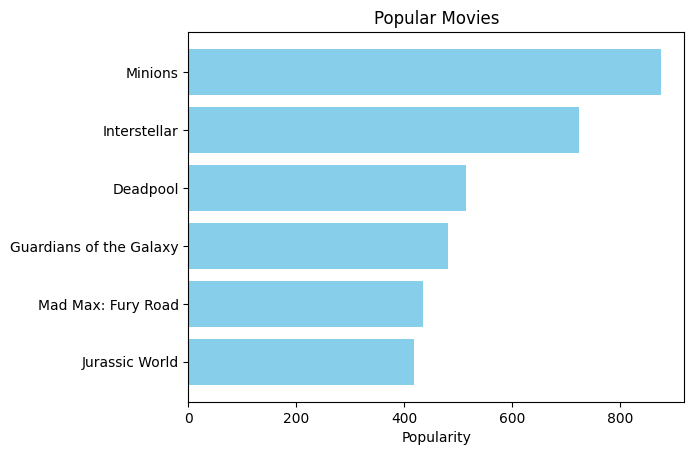

In [20]:
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [21]:
df2['overview'].head(5)


#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')


In [23]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()



In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]


rec_movies =get_recommendations('Avatar')